# Sentiment Analysis using Amazon Product Reviews 

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Amazon Dataset

In [16]:
file_path = 'amazon_reviews.csv'  # Dataset source: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products
df = pd.read_csv(file_path)

## Display available columns

In [4]:
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand', 'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs']


# Select relevant columns and drop missing values

In [5]:
df = df[['reviews.text', 'reviews.rating']].dropna()

## Create Sentiment Labels

# 1–2 = Negative (0), 3 = Neutral (2), 4–5 = Positive (1)

In [6]:
def get_sentiment(rating):
    if rating <= 2:
        return 0
    elif rating == 3:
        return 2
    else:
        return 1

df['label'] = df['reviews.rating'].apply(get_sentiment)
df = df.rename(columns={'reviews.text': 'text'})
df = df[['text', 'label']]

## Visualize Sentiment Distribution

C:\Users\sree\AppData\Local\Temp\ipykernel_11416\3060945529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


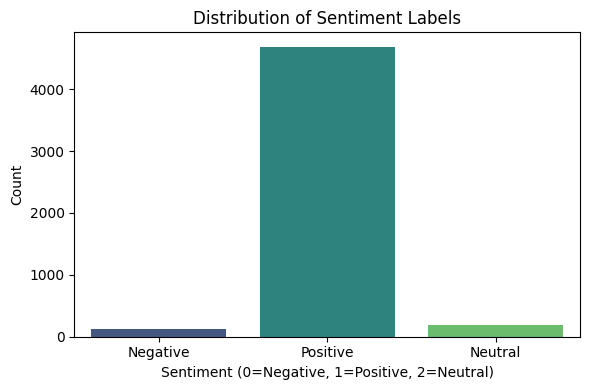

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0=Negative, 1=Positive, 2=Neutral)')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Negative', 'Positive', 'Neutral'])
plt.tight_layout()
plt.savefig("screenshots/sentiment_distribution.png")
plt.show()

## Clean the Text

In [8]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply cleaning

In [9]:
df['cleaned_text'] = df['text'].apply(clean_text)

## TF-IDF Vectorization

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

##  Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Try Different Models


🔍 Training Logistic Regression...
Accuracy: 0.9380
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
    Positive       0.94      1.00      0.97       937
     Neutral       1.00      0.03      0.05        39

    accuracy                           0.94      1000
   macro avg       0.65      0.34      0.34      1000
weighted avg       0.92      0.94      0.91      1000



C:\Users\sree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

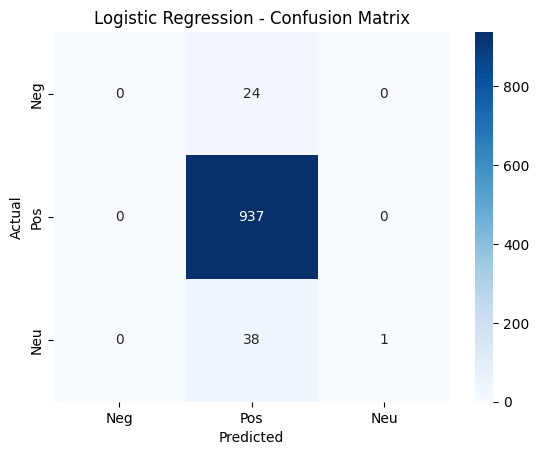


🔍 Training Naive Bayes...
Accuracy: 0.9370
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
    Positive       0.94      1.00      0.97       937
     Neutral       0.00      0.00      0.00        39

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



C:\Users\sree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sree\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

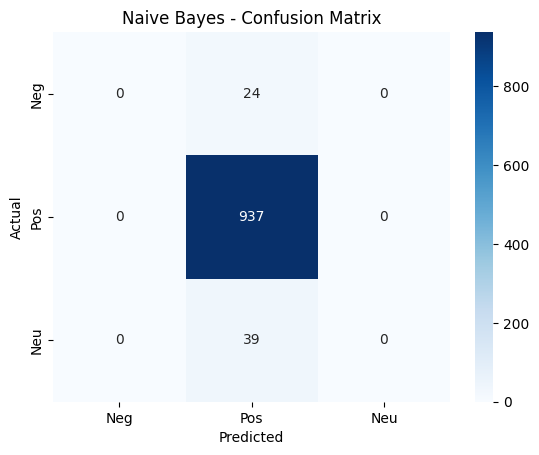


🔍 Training Random Forest...
Accuracy: 0.9530
              precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
    Positive       0.95      1.00      0.98       937
     Neutral       0.91      0.26      0.40        39

    accuracy                           0.95      1000
   macro avg       0.95      0.52      0.61      1000
weighted avg       0.95      0.95      0.94      1000



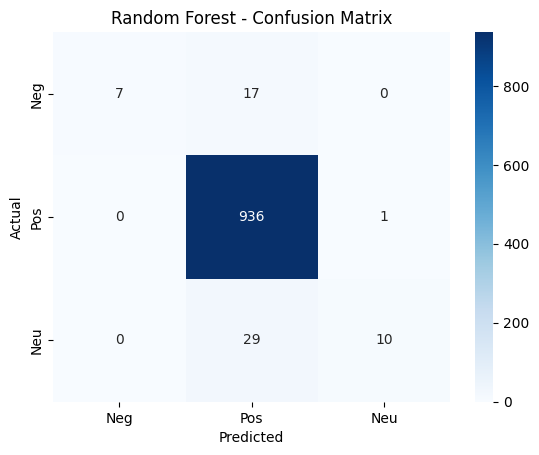


🔍 Training Linear SVC...
Accuracy: 0.9470
              precision    recall  f1-score   support

    Negative       1.00      0.21      0.34        24
    Positive       0.95      1.00      0.97       937
     Neutral       0.70      0.18      0.29        39

    accuracy                           0.95      1000
   macro avg       0.88      0.46      0.53      1000
weighted avg       0.94      0.95      0.93      1000



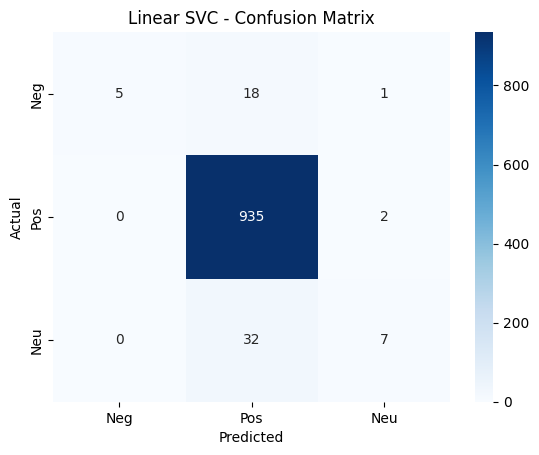

In [12]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Linear SVC": LinearSVC()
}

results = {}

for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral']))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos', 'Neu'], yticklabels=['Neg', 'Pos', 'Neu'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f"screenshots/conf_matrix_{name.replace(' ', '_').lower()}.png")
    plt.show()


##  Compare Model Accuracies

C:\Users\sree\AppData\Local\Temp\ipykernel_11416\3568948641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.values()), y=list(results.keys()), palette='mako')


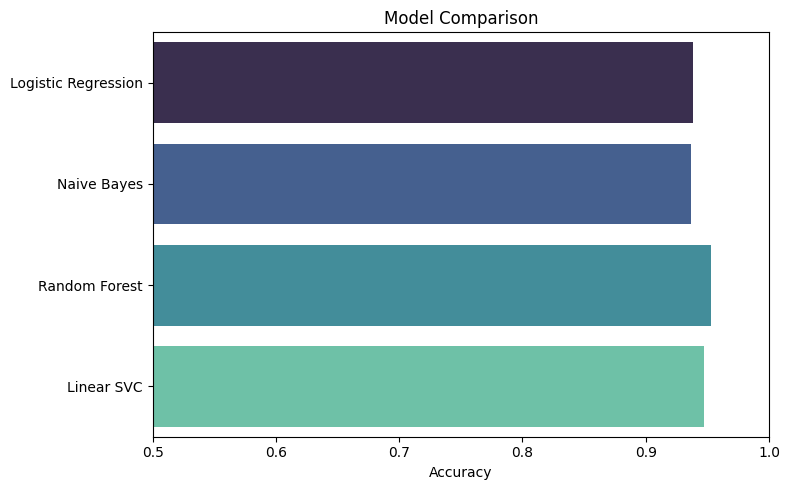

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.values()), y=list(results.keys()), palette='mako')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0.5, 1.0)
plt.tight_layout()
plt.savefig("screenshots/models_comparison.png")
plt.show()

## Visualize TF-IDF Word Importance (Top Words)

C:\Users\sree\AppData\Local\Temp\ipykernel_11416\3241978660.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='cool')


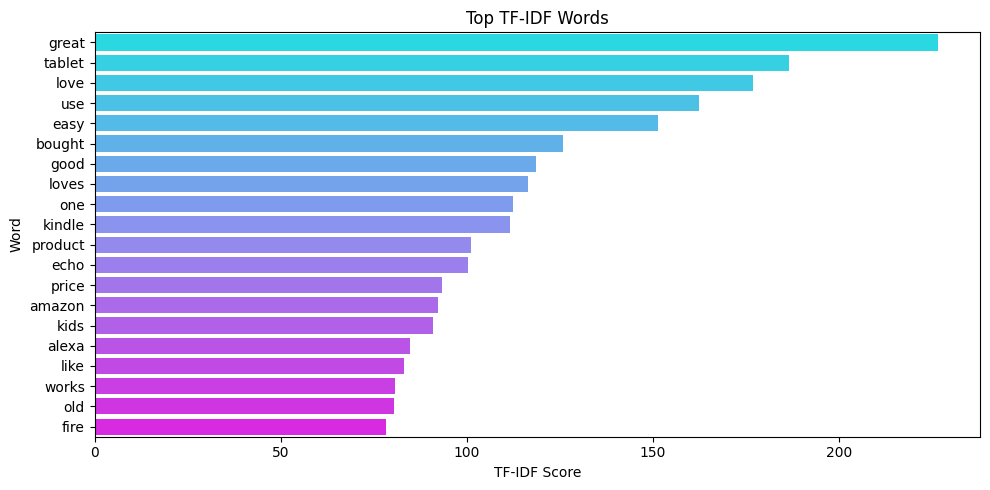

In [14]:
def plot_top_words(vectorizer, X, n=20):
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    words, freqs = zip(*words_freq)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(freqs), y=list(words), palette='cool')
    plt.title('Top TF-IDF Words')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.savefig("screenshots/top_tfidf_words.png")
    plt.show()

plot_top_words(vectorizer, X)

## Save Best Model and Vectorizer

In [15]:
best_model_name = max(results, key=results.get)
final_model = models[best_model_name]
joblib.dump(final_model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print(f"\n Best model ({best_model_name}) saved as 'sentiment_model.pkl'")


 Best model (Random Forest) saved as 'sentiment_model.pkl'
